In [9]:
import pandas as pd

In [10]:
DATA_DIR_PATH = "../.data/measurments/"
LABEL = "20347900_jit_20"

In [11]:
path = DATA_DIR_PATH + LABEL + ".csv"
df = pd.read_csv(path)
df_wide = df.pivot(index='block_num', columns='run_type', values='exe_time').reset_index()

## Paired t-test

In [12]:
import scipy.stats as stats

### AOT vs Native

In [13]:
t_statistic, p_value = stats.ttest_rel(df_wide['aot'], df_wide['native'])
print(f"p-value: {p_value:.2f}")

p-value: 0.15


### JIT vs Native

In [14]:
t_statistic, p_value = stats.ttest_rel(df_wide['jit'], df_wide['native'])
print(f"p-value: {p_value:.2f}")

p-value: 0.09


## Histograms

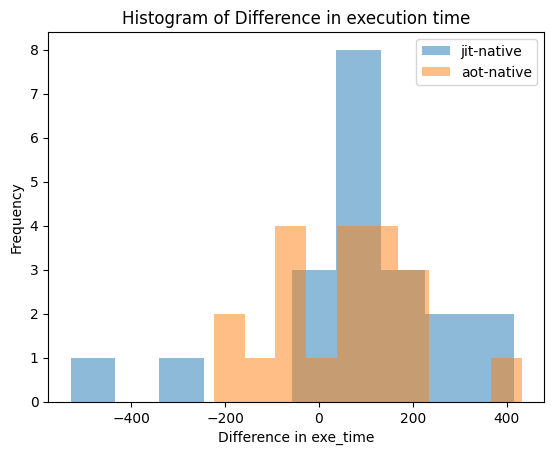

In [16]:
import matplotlib.pyplot as plt

plt.hist(df_wide['jit'] - df_wide['native'], bins=10, alpha=0.5, label='jit-native')
plt.hist(df_wide['aot'] - df_wide['native'], bins=10, alpha=0.5, label='aot-native')

plt.xlabel('Difference in exe_time')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in execution time')
plt.legend()

plt.show()